# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

# Importing Data

In [51]:
mdata = pd.read_csv('VAR_data.csv')

In [52]:
mdata.head()

,date,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,31-03-1959,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,30-06-1959,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,30-09-1959,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,31-12-1959,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,31-03-1960,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [53]:
mdata.date = pd.to_datetime(mdata.date, dayfirst =True)
mdata.set_index("date", inplace= True)

In [54]:
mdata.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [56]:
mdata = mdata[['realgdp','realcons','realinv']]
mdata.head()

,realgdp,realcons,realinv
date,,,
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


<AxesSubplot:xlabel='date'>

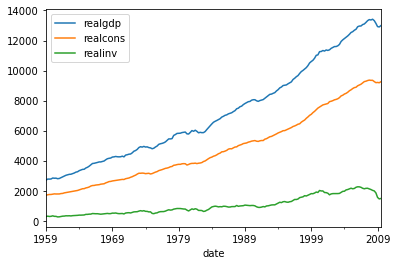

In [57]:
mdata.plot()

<AxesSubplot:xlabel='date'>

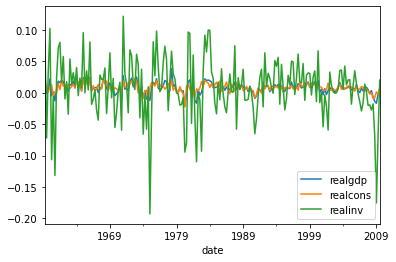

In [58]:
data = np.log(mdata).diff().dropna()
data.plot()

# Granger’s causality test 

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests
data = mdata[["realgdp", "realcons"]].pct_change().dropna()
#Performing test on for realgdp and realcons.
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

In [60]:
data = mdata[["realgdp", "realinv"]].pct_change().dropna()
#Performing test on for realgdp and realinv.
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7235  , p=0.1908  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=1.7496  , p=0.1859  , df=1
likelihood ratio test: chi2=1.7421  , p=0.1869  , df=1
parameter F test:         F=1.7235  , p=0.1908  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1601  , p=0.1181  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=4.4309  , p=0.1091  , df=2
likelihood ratio test: chi2=4.3825  , p=0.1118  , df=2
parameter F test:         F=2.1601  , p=0.1181  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5522  , p=0.2024  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=4.8263  , p=0.1850  , df=3
likelihood ratio test: chi2=4.7687  , p=0.1895  , df=3
parameter F test:         F=1.5522  , p=0.2024  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4008  , p=0.2353  

In [63]:
data = mdata[["realcons", "realinv"]].pct_change().dropna()
#Performing test on for realinv and realcons.
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9571  , p=0.0155  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=6.0474  , p=0.0139  , df=1
likelihood ratio test: chi2=5.9582  , p=0.0146  , df=1
parameter F test:         F=5.9571  , p=0.0155  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0988  , p=0.3353  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=2.2539  , p=0.3240  , df=2
likelihood ratio test: chi2=2.2413  , p=0.3261  , df=2
parameter F test:         F=1.0988  , p=0.3353  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2671  , p=0.8490  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=0.8306  , p=0.8421  , df=3
likelihood ratio test: chi2=0.8289  , p=0.8425  , df=3
parameter F test:         F=0.2671  , p=0.8490  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3127  , p=0.8693  

# Cointegration test

Cointegration helps to find out the statistical connection between two or more time series. When two or more time series are cointegrated, they have a long run, statistically significant relationship.

In [73]:
data = mdata[["realgdp","realcons", "realinv"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen
out = coint_johansen(data,-1,5)

In [74]:
traces = out.lr1

In [75]:
traces

array([69.54948157, 22.74373305,  2.59850753])

# VAR Modelling

In [77]:
var = VAR(data)

C:\Users\SARVESH GAWAND\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [78]:
x= var.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,-27.69,-27.64,9.439e-13,-27.67
1,-28.00,-27.79*,6.905e-13,-27.92*
2,-28.00,-27.64,6.884e-13,-27.86
3,-28.02*,-27.50,6.787e-13*,-27.81
4,-28.01,-27.34,6.863e-13,-27.74
5,-28.00,-27.18,6.901e-13,-27.67
6,-27.95,-26.97,7.283e-13,-27.55
7,-27.91,-26.77,7.598e-13,-27.45
8,-27.91,-26.62,7.578e-13,-27.39
9,-27.94,-26.49,7.392e-13,-27.35


In [79]:
results = var.fit(3)
#We can check the summary of the model by.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Dec, 2022
Time:                     13:27:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4082
Nobs:                     199.000    HQIC:                  -27.7037
Log likelihood:           1959.41    FPE:                7.60784e-13
AIC:                     -27.9047    Det(Omega_mle):     6.56722e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001353         0.001274            1.062           0.288
L1.realgdp         -0.294279         0.172029           -1.711           0.087
L1.realcons         0.673839         0.132132            5.100    

In the results, we found that the correlation between realgdp and realinv is high,

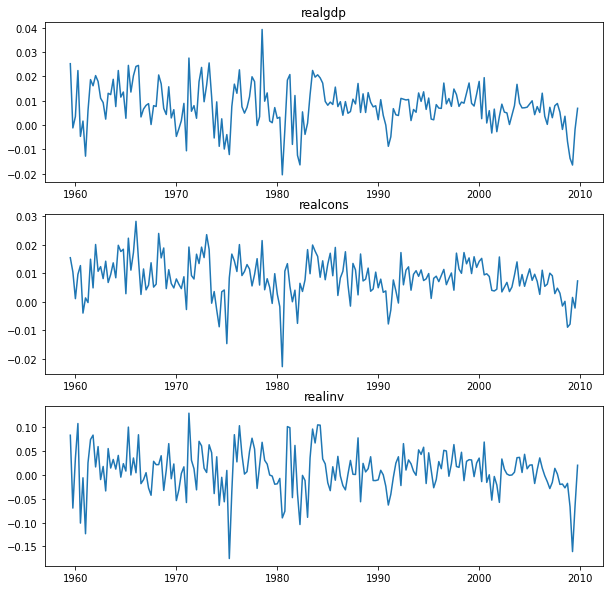

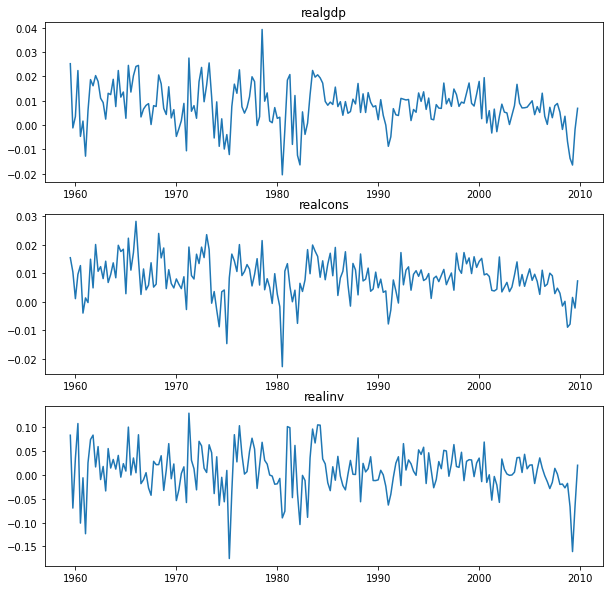

In [80]:
results.plot()

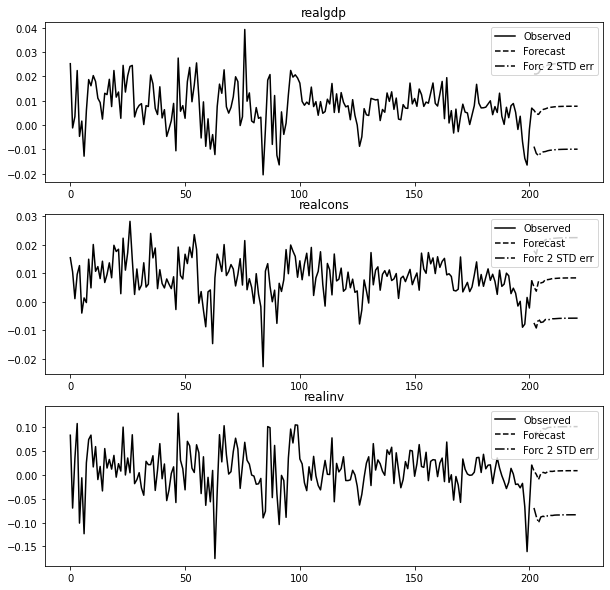

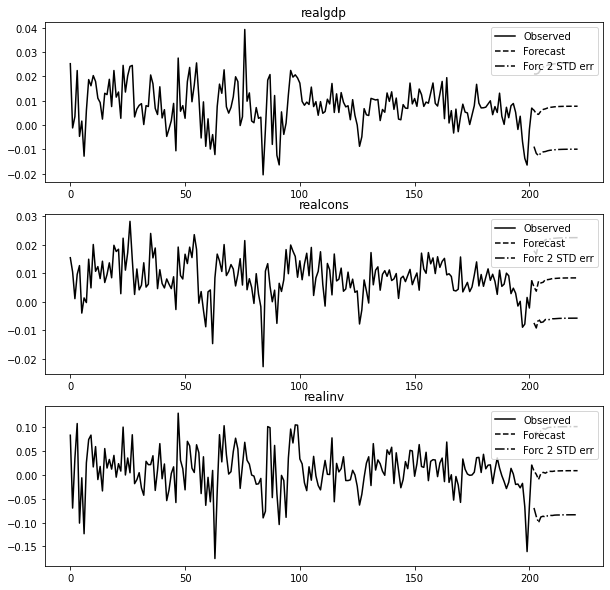

In [81]:
results.plot_forecast(20)